In [1]:
# script to plot regional and temporal distribution of bromoform 
# demonstrate temporal and spatial variation during contrast in the bl 
# date created: 2/18/2020
# author: sofia chelpon

In [2]:
import numpy as np 
import xarray as xr
import pandas as pd 
import datetime 
import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits import mplot3d

%matplotlib inline
%config inlinebackend.figure_format='retina'

In [3]:
# load in data
awas_df = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/awas_data_df.pkl")
toga_df = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_ratios/toga_data_df.pkl")
print(awas_df.CHBr3_Bromoform.notnull().count())
print(toga_df.Bromoform.notnull().count())

585
2231


In [4]:
awas_bromo = awas_df[['Flight', 'Intrument', 'GGALT', 'GGLAT', 'GGLON', 'CHBr3_Bromoform']]
awas_bromo = awas_bromo.rename(columns={"CHBr3_Bromoform": "Bromoform"})
toga_bromo = toga_df[['Flight', 'Intrument', 'GGALT', 'GGLAT', 'GGLON', 'Bromoform']]

bromo_col = toga_bromo.append(awas_bromo, ignore_index=True)
bromo = bromo_col[bromo_col['GGALT']<2000]
bromo.Bromoform.notnull().count()

280

In [5]:
###### -------------------------- plot boxplot per region 
# sort into new column named 'bin' using 
lat_cuts = [0, 5, 10, 15, 20]
lon_cuts = [130, 138, 146, 154, 162]

bin = []
bin = []

for index, row in bromo.iterrows():
    if ((row['GGLAT'] > lat_cuts[0]) & (row['GGLAT'] < lat_cuts[1])):
        if ((row['GGLON'] > lon_cuts[0]) & (row['GGLON'] < lon_cuts[1])):
            thisbin = 13 
        if ((row['GGLON'] > lon_cuts[1]) & (row['GGLON'] < lon_cuts[2])):
            thisbin = 14 
        if ((row['GGLON'] > lon_cuts[2]) & (row['GGLON'] < lon_cuts[3])):
            thisbin = 15 
        if ((row['GGLON'] > lon_cuts[3]) & (row['GGLON'] < lon_cuts[4])):
            thisbin = 16 
    if ((row['GGLAT'] > lat_cuts[1]) & (row['GGLAT'] < lat_cuts[2])):
        if ((row['GGLON'] > lon_cuts[0]) & (row['GGLON'] < lon_cuts[1])):
            thisbin = 9 
        if ((row['GGLON'] > lon_cuts[1]) & (row['GGLON'] < lon_cuts[2])):
            thisbin = 10 
        if ((row['GGLON'] > lon_cuts[2]) & (row['GGLON'] < lon_cuts[3])):
            thisbin = 11 
        if ((row['GGLON'] > lon_cuts[3]) & (row['GGLON'] < lon_cuts[4])):
            thisbin = 12 
    if ((row['GGLAT'] > lat_cuts[2]) & (row['GGLAT'] < lat_cuts[3])):
        if ((row['GGLON'] > lon_cuts[0]) & (row['GGLON'] < lon_cuts[1])):
            thisbin = 5
        if ((row['GGLON'] > lon_cuts[1]) & (row['GGLON'] < lon_cuts[2])):
            thisbin = 6
        if ((row['GGLON'] > lon_cuts[2]) & (row['GGLON'] < lon_cuts[3])):
            thisbin = 7 
        if ((row['GGLON'] > lon_cuts[3]) & (row['GGLON'] < lon_cuts[4])):
            thisbin = 8 
    if ((row['GGLAT'] > lat_cuts[3]) & (row['GGLAT'] < lat_cuts[4])):
        if ((row['GGLON'] > lon_cuts[0]) & (row['GGLON'] < lon_cuts[1])):
            thisbin = 1 
        if ((row['GGLON'] > lon_cuts[1]) & (row['GGLON'] < lon_cuts[2])):
            thisbin = 2 
        if ((row['GGLON'] > lon_cuts[2]) & (row['GGLON'] < lon_cuts[3])):
            thisbin = 3 
        if ((row['GGLON'] > lon_cuts[3]) & (row['GGLON'] < lon_cuts[4])):
            thisbin = 4 
    bin.append(thisbin)
    
bromo['bin'] = bin
bromo['bin'].value_counts().sum()

//anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


280

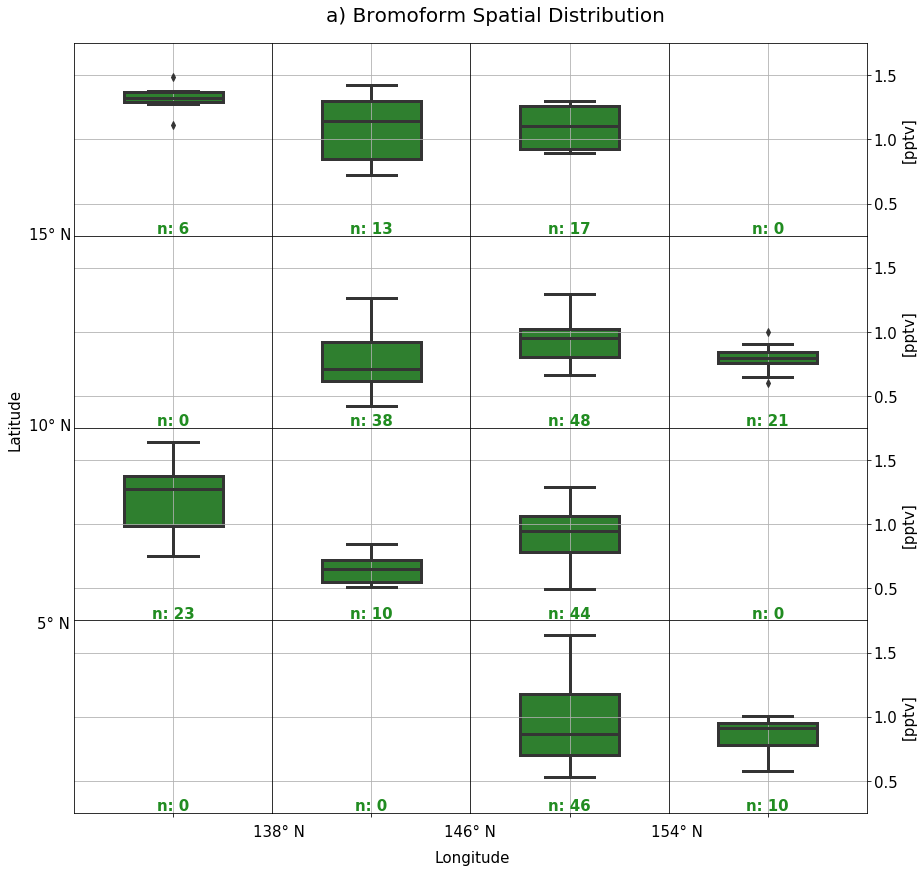

In [6]:
# plot this 
fig, axs = plt.subplots(4, 4, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0}, figsize = (12, 12))
(ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16)= axs
fig.suptitle('a) Bromoform Spatial Distribution', fontsize=20)

# boxes 
inner = [1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15]
outer = [4, 8, 12, 16]
bottom = [13, 14, 15, 16]
left = [1, 5, 9, 13]

# colors 
myred = [0.83, 0.13, 0.18]
mygreen = [0.13, 0.55, 0.13]

# build
for ii, myax in enumerate(axs.flat):
    bromo_bin = bromo[bromo['bin'] == (ii+1)]
    sns.boxplot(x=bromo_bin["Bromoform"], color=mygreen, ax = myax, orient = 'v', whis = 1.5,
                width = 0.5, linewidth = 3)
    myax.yaxis.set_label_position("right")
    myax.yaxis.tick_right()
    myax.set_ylim([0.25, 1.75])
    myax.grid(which = 'major')

    # Calculate number of obs per group & median to position labels
    nobs = np.sum(bromo_bin['Bromoform'].count())
    nobs = "n: " + str(nobs)
    myax.text(0, 0.27, nobs, horizontalalignment='center', fontsize=15, color=mygreen, weight='bold')
    
    if (ii+1) in inner: 
        myax.set_yticklabels([])
    if (ii+1) in outer:
        myax.set_yticks(np.arange(0.5, 1.75, step=0.5))
        myax.set_yticklabels((np.arange(0.5, 1.75, step=0.5)), fontsize=15)
        myax.tick_params(axis='y', labelright='on')
        myax.set_ylabel('[pptv]', fontsize = 15)
    
# annotate to show latitude/longitude areas
# latitude 
plt.gcf().text(-0.065, 0.47, 'Latitude', fontsize=15, rotation=90)
#plt.gcf().text(-0.04, 0.93, '20\u00B0 N', fontsize=15)
plt.gcf().text(-0.04, 0.71, '15\u00B0 N', fontsize=15)
plt.gcf().text(-0.04, 0.49, '10\u00B0 N', fontsize=15)
plt.gcf().text(-0.03, 0.26, '5\u00B0 N', fontsize=15)
#plt.gcf().text(-0.03, 0.04, '0\u00B0 N', fontsize=15)

# longitude 
plt.gcf().text(0.43, -0.01, 'Longitude', fontsize=15)

plt.gcf().text(0.22, 0.02, '138\u00B0 N', fontsize=15)
plt.gcf().text(0.44, 0.02, '146\u00B0 N', fontsize=15)
plt.gcf().text(0.68, 0.02, '154\u00B0 N', fontsize=15)


# tight layout 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# save 
fig.savefig('bromoform_regional.svg', bbox_inches="tight", format='svg', dpi=1200)
fig.savefig('bromoform_regional.pdf', bbox_inches="tight")


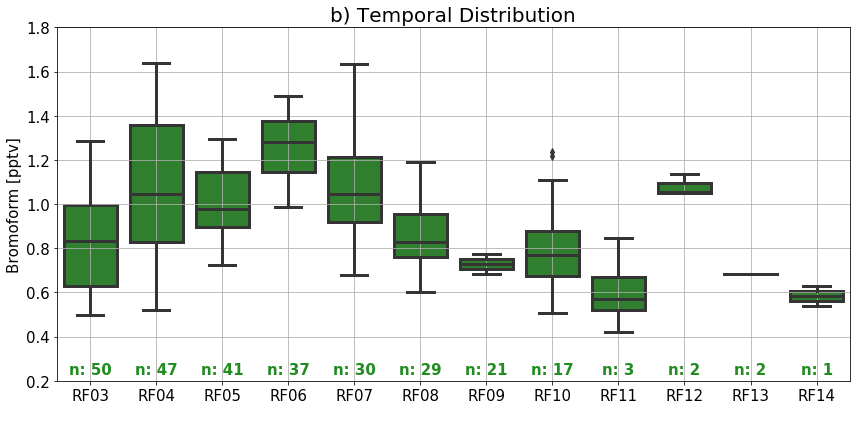

In [7]:
###### -------------------------- plot boxplot per flight
# plot boxplot per flight 
fig, ax = plt.subplots(figsize = (12, 6))

# use seaborn 
ax = sns.boxplot(x="Flight", y="Bromoform", data=bromo, color=mygreen, linewidth = 3)
ax.grid(which = 'major')
ax.set_xlabel(' ')
ax.set_ylabel('Bromoform [pptv]', fontsize = 15)
ax.set_title('b) Temporal Distribution', fontsize = 20)
ax.tick_params(axis='both', labelsize=15)
ax.set_ylim([0.2, 1.8])

# Calculate number of obs per group & median to position labels
medians = bromo.groupby(['Flight'])['Bromoform'].median().values
nobs = bromo['Flight'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], 0.2 + 0.03, nobs[tick],
    horizontalalignment='center',  fontsize=15, color=mygreen, weight='bold')

plt.tight_layout()

# save 
fig.savefig('bromoform_temporal.svg', format='svg', dpi=1200)
fig.savefig('bromoform_temporal.pdf')